In [20]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
import pylab as py

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [21]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [22]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'deathpen_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'hometown_1': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'political_': {1, 2, 3},
 'gender_1': {1, 2},
 'premaritalsex_': {1, 2, 3},
 'age_1': {1, 2},
 'ethnicity_1': {1, 2, 3, 4},
 'euthanasia_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'abortion_': {1, 2, 3}}

In [23]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [24]:
attributes

{1: array([[3., 3., 1., ..., 3., 2., 3.],
        [2., 1., 1., ..., 2., 3., 2.],
        [3., 3., 1., ..., 3., 3., 3.],
        ...,
        [2., 1., 1., ..., 2., 1., 1.],
        [1., 2., 3., ..., 2., 1., 1.],
        [1., 3., 1., ..., 3., 3., 3.]]),
 2: array([[1., 1., 3., ..., 3., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [2., 3., 1., ..., 3., 1., 1.],
        ...,
        [2., 3., 1., ..., 1., 1., 1.],
        [3., 3., 2., ..., 3., 1., 1.],
        [1., 3., 1., ..., 2., 1., 2.]]),
 3: array([[1., 3., 2., 3., 2., 2., 3., 1., 1., 3., 1., 3.],
        [1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.],
        [1., 2., 2., 1., 2., 2., 1., 2., 1., 1., 3., 1.],
        [3., 3., 1., 3., 3., 2., 3., 1., 3., 3., 3., 1.],
        [1., 3., 1., 3., 1., 1., 3., 2., 1., 3., 2., 3.],
        [1., 3., 1., 1., 2., 2., 1., 1., 2., 3., 1., 3.],
        [1., 3., 2., 3., 1., 1., 3., 1., 1., 2., 2., 1.],
        [1., 3., 2., 3., 3., 2., 3., 2., 1., 2., 1., 3.],
        [1., 1., 1., 3., 1., 

In [25]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    deathpen_  gaymarriage_  hometown_1  homosexual_  political_  gender_1  \
0         3.0           3.0         1.0          3.0         1.0       2.0   
1         2.0           1.0         1.0          2.0         1.0       2.0   
2         3.0           3.0         1.0          1.0         3.0       1.0   
3         1.0           3.0         1.0          3.0         3.0       1.0   
4         2.0           2.0         1.0          3.0         2.0       1.0   
..        ...           ...         ...          ...         ...       ...   
93        3.0           1.0         2.0          1.0         1.0       1.0   
94        3.0           1.0         1.0          3.0         3.0       2.0   
95        2.0           1.0         1.0          1.0         2.0       1.0   
96        1.0           2.0         3.0          1.0         1.0       2.0   
97        1.0           3.0         1.0          3.0         2.0       1.0   

    premaritalsex_  age_1  ethnicity_1  euthanasia_  marijuana_

In [26]:
ord_list_of_attributes

{'abortion_',
 'deathpen_',
 'euthanasia_',
 'gaymarriage_',
 'homosexual_',
 'marijuana_',
 'political_',
 'premaritalsex_'}

In [27]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'deathpen_', 'gaymarriage_', 'homosexual_', 'political_', 'premaritalsex_', 'euthanasia_', 'abortion_', 'marijuana_'}
{1: array([[3., 3., 3., 1., 3., 3., 3., 2.],
       [2., 1., 2., 1., 2., 2., 2., 3.],
       [3., 3., 1., 3., 3., 3., 3., 3.],
       [1., 3., 3., 3., 3., 1., 3., 2.],
       [2., 2., 3., 2., 3., 1., 3., 1.],
       [1., 1., 1., 2., 1., 3., 1., 1.],
       [2., 2., 2., 1., 1., 1., 1., 1.],
       [2., 2., 1., 2., 1., 2., 2., 3.],
       [1., 3., 3., 2., 3., 3., 3., 2.],
       [1., 3., 3., 3., 3., 1., 1., 3.],
       [1., 1., 1., 2., 1., 3., 1., 2.],
       [1., 2., 1., 1., 1., 1., 1., 1.],
       [1., 3., 3., 1., 3., 2., 1., 3.],
       [1., 1., 2., 1., 1., 1., 1., 3.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [1., 1., 2., 1., 2., 3., 1., 2.],
       [2., 1., 1., 1., 3., 2., 1., 2.],
       [3., 1., 1., 1., 1., 3., 1., 3.],
       [2., 3., 3., 3., 2., 3., 3., 3.],
       [1., 3., 1., 1., 3., 3., 1., 3.],
       [3., 3., 3., 1., 3., 3., 3., 3.],
       [1., 3., 

## Max difference of new attributes

In [28]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances

def calc_polarities_single_attribute(agents, opinion_nr):
    N, A = agents.shape
    attrs = [agents[i, opinion_nr] for i in range(0,N)]
    
    polarities = np.zeros([N,N])
    for i in range(0,N):
        for j in range(i+1,N):
            polarities[i,j] = (attrs[i] == attrs[j])*2-1
            polarities[j,i] = polarities[i,j]
    return polarities

(array([0.329, 1.01 , 0.916, 2.087, 0.987, 1.803, 1.52 , 0.585, 0.698,
        0.065]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

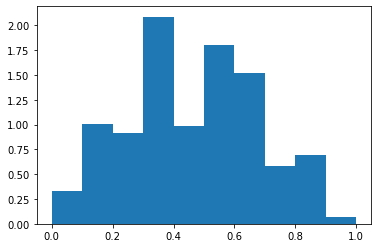

In [29]:
dists = calc_distances(ord_attributes[1], 2)

plt.hist(dists.flatten(), density=True)

In [30]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[1., 3., 1., 1., 1., 1., 1., 1.],
        [1., 3., 1., 1., 1., 1., 1., 1.],
        [3., 1., 3., 3., 3., 3., 3., 3.]]),
 {'abortion_',
  'deathpen_',
  'euthanasia_',
  'gaymarriage_',
  'homosexual_',
  'marijuana_',
  'political_',
  'premaritalsex_'})

In [31]:
(dists <= 0.5)*2-1-np.eye(dists.shape[0])

array([[ 0.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  0., -1.],
       [ 1.,  1.,  1., ..., -1., -1.,  0.]])

In [32]:
def calc_link_polarity2(agent1, agent2, th, attr_dif):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [33]:
# polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(pol2)

0.7293682937092363

In [34]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [35]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [36]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(ord_attributes[sem], 0.1, 2)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.06666666666666667, 0.06435409215232485)

In [37]:
sem = 4
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(ord_attributes[sem], theta, 2)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

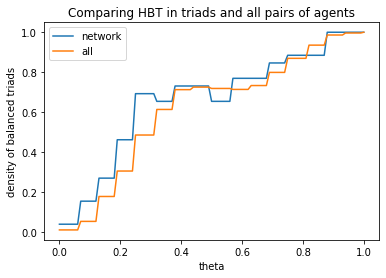

In [38]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Opinion probabilities

In [39]:
op = 1
sem = 1

qrs = np.zeros(3)
qrs = np.array([sum([ord_attributes[sem][k,op - 1] == val for k, node in enumerate(data[sem].nodes())]) for val in range(1,4)])
qrs = qrs / np.sum(qrs)
qrs

array([0.541, 0.255, 0.204])

In [40]:
names = list()
for j, attribute in enumerate(ord_list_of_attributes):
    print(attribute)
    names.append(attribute[0:-1])
names

deathpen_
gaymarriage_
homosexual_
political_
premaritalsex_
euthanasia_
abortion_
marijuana_


['deathpen',
 'gaymarriage',
 'homosexual',
 'political',
 'premaritalsex',
 'euthanasia',
 'abortion',
 'marijuana']

In [41]:
indexes = np.argsort(names)
indexes

array([6, 0, 5, 1, 2, 7, 3, 4])

In [42]:
[names[i] for i in indexes]

['abortion',
 'deathpen',
 'euthanasia',
 'gaymarriage',
 'homosexual',
 'marijuana',
 'political',
 'premaritalsex']

In [43]:
pA1 = 1-6*np.prod(qrs)
pA1

0.8310652874227575

In [44]:
calc_polarities_single_attribute(ord_attributes[sem], op)

array([[ 0., -1.,  1., ..., -1., -1.,  1.],
       [-1.,  0., -1., ...,  1., -1., -1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0., -1., -1.],
       [-1., -1., -1., ..., -1.,  0., -1.],
       [ 1., -1.,  1., ..., -1., -1.,  0.]])

In [45]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_polarities_single_attribute(ord_attributes[sem], op - 1)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.8222222222222222, 0.8257679360403956)

Analiza wyników Asi pokazała, że prob z modelu jest to średnia ważona (liczbą triad w semestrze) po semestrach z równania 1-6qrs. 

Update: chyba jednak Asia sumuje wystąpienia qrs we wszystkich semestrach i je bierze do analizy.

In [46]:
from itertools import chain
sem = 1
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))
triad_agents

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 12, 13, 14, 15, 17, 18, 19, 20,
       21, 22, 23, 34, 35, 36, 37, 41, 42, 43, 44, 49, 50, 53, 56, 57, 59,
       62, 64, 69, 74, 77, 80, 83, 85, 94])

In [47]:
def get_qrs(attrs):
    qrs = dict((i, []) for i in range(1,7))
    qrs2 = [np.zeros(3) for _ in range(0,8)]
    N2 = 0
    for sem in range(1,7):
        triads = get_triads(data[sem])
        triad_agents = np.unique(list(chain.from_iterable(triads)))
        
        N = len(triad_agents)
        N2 += N
        
        qrs[sem] = [np.array([sum([ord_attributes[sem][k,op - 1] == val for k in triad_agents]) for val in range(1,4)])/N for op in range(1,9)]
        for op in range(0,8):
            qrs2[op] += np.array([sum([ord_attributes[sem][k,op] == val for k in triad_agents]) for val in range(1,4)])
    
    for op in range(0,8):
        qrs2[op] /= N2

    return qrs, qrs2

def get_bal_probs(qrs_s):
    bal_probs = dict((i, []) for i in range(1,7))
    for sem in range(1,7):
        bal_probs[sem] = np.array([1 - 6*np.prod(qrs) for qrs in qrs_s[sem]])
    
    return bal_probs

def get_bal_probs2(qrs_s2):
    bal_probs = np.array([1-6*np.prod(qrs) for qrs in qrs_s2])
    
    return bal_probs

def get_true_bal_probs(attrs):
    true_bal_probs = dict((i, []) for i in range(1,7))
    for sem in range(1,7):
        triads = get_triads(data[sem])
        true_bal_probs[sem] = np.zeros(8)
        for op in range(0,8):
            polarities = calc_polarities_single_attribute(attrs[sem], op)
            true_bal_probs[sem][op] = balanced_triad_density_network(polarities, triads)
    return true_bal_probs

"""Following returns weighted average (with number of triads) of getting a balanced triad. 
The 2nd variable are std that assume that probs are Bernoulli probabilities. 
std does not make sense for real data. 
"""
def get_average_probs(probs):
    triads_num = np.zeros(6)
    for sem in range(1,7):
        triads_num[sem-1] = len(get_triads(data[sem]))
    triads_sum = np.sum(triads_num)
    
    ave_probs = np.zeros(8)
    std_probs = np.zeros(8)
    for op in range(0,8):
        probs_temp = np.array([probs[sem][op] for sem in range(1,7)])
        ave_probs[op] = np.sum(probs_temp * triads_num) / triads_sum
        
        std_probs[op] = np.sum(np.sqrt(probs_temp * (1-probs_temp) * triads_num)) / triads_sum
    return ave_probs, std_probs

In [71]:
qrs_s, qrs_s2 = get_qrs(ord_attributes)
bal_probs = get_bal_probs(qrs_s)
bal_probs

{1: array([0.859, 0.837, 0.867, 0.81 , 0.87 , 0.817, 0.887, 0.829]),
 2: array([0.893, 0.838, 0.928, 0.829, 0.962, 0.834, 0.949, 0.834]),
 3: array([0.919, 0.848, 0.938, 0.814, 0.938, 0.797, 0.905, 1.   ]),
 4: array([0.846, 0.819, 0.826, 0.85 , 0.907, 0.812, 0.906, 0.779]),
 5: array([0.889, 0.792, 0.915, 0.841, 0.913, 0.795, 0.929, 0.88 ]),
 6: array([0.947, 0.846, 1.   , 0.793, 0.942, 0.803, 0.897, 0.942])}

In [50]:
true_bal_probs = get_true_bal_probs(ord_attributes)
true_bal_probs

{1: array([0.822, 0.8  , 0.889, 0.822, 0.978, 0.667, 0.867, 0.756]),
 2: array([0.808, 1.   , 0.962, 0.808, 0.962, 0.731, 0.885, 1.   ]),
 3: array([0.889, 0.778, 1.   , 0.778, 1.   , 0.444, 0.889, 1.   ]),
 4: array([0.731, 0.962, 0.885, 0.846, 0.885, 0.731, 0.923, 0.885]),
 5: array([0.8 , 0.8 , 0.9 , 0.8 , 0.85, 0.75, 0.9 , 0.85]),
 6: array([1.   , 0.917, 1.   , 0.833, 0.917, 0.75 , 0.917, 0.917])}

In [51]:
save_ = False

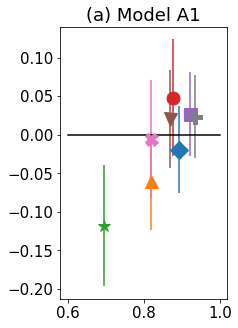

In [53]:
true_probs, _ = get_average_probs(true_bal_probs)
A1_probs, A1_probs_std = get_average_probs(bal_probs)

markers=["^","o","s","X","P" ,"*","D", "v"]

fig, ax = plt.subplots()
# plt.rcParams["figure.figsize"] = (10,5)
for i in indexes:
#     ax.plot(x=true_probs, y=true_probs - A1_probs, marker=markers[i], markersize=10, label=attribute)
    plt.errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i],yerr=A1_probs_std[i], marker=markers[i], 
                 markersize=13, label=names[i])

plt.title('(a) Model A1')
xlim = (0.6,1)
fig.set_size_inches(3, 5)
plt.plot(xlim,(0,0), color='black')
# plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.rcParams.update({'font.size': 15})
    
if save_:
    plt.savefig("A1.pdf",dpi=600,bbox_inches='tight',format='pdf')

    with open(f'A1.pkl','wb') as fid:
        pickle.dump(fig, fid)
    # pickle.dump(fig, file('A1.pickle', 'w'))


## Counting all attributes from all semesters together to get qrs

In [54]:
qrs_s2

[array([0.653, 0.179, 0.168]),
 array([0.316, 0.189, 0.495]),
 array([0.439, 0.087, 0.474]),
 array([0.526, 0.235, 0.24 ]),
 array([0.454, 0.066, 0.48 ]),
 array([0.357, 0.209, 0.434]),
 array([0.628, 0.082, 0.291]),
 array([0.423, 0.153, 0.423])]

In [67]:
bal_probs = get_bal_probs2(qrs_s2)
bal_probs

array([0.882, 0.823, 0.892, 0.823, 0.913, 0.806, 0.911, 0.835])

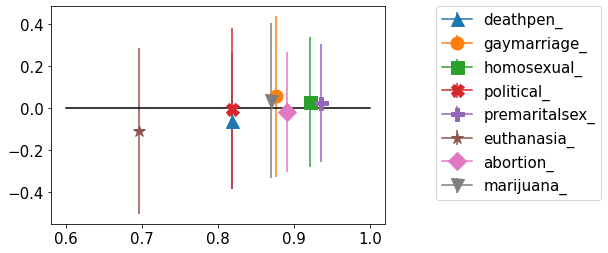

In [57]:
true_probs, _ = get_average_probs(true_bal_probs)
A1_probs = bal_probs
A1_probs_std = np.sqrt(bal_probs*(1-bal_probs))
# A1_probs, A1_probs_std = get_average_probs(bal_probs)

markers=["^","o","s","X","P" ,"*","D", "v"]

fig, ax = plt.subplots()
for i, attribute in enumerate(ord_list_of_attributes):
#     ax.plot(x=true_probs, y=true_probs - A1_probs, marker=markers[i], markersize=10, label=attribute)
    plt.errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i],yerr=A1_probs_std[i], marker=markers[i], 
                 markersize=13, label=attribute)
    
xlim = (0.6,1)
plt.plot(xlim,(0,0), color='black')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.rcParams.update({'font.size': 15})

if save_:
    plt.savefig("test.pdf",dpi=600,bbox_inches='tight',format='pdf')

This method gives much bigger error bars. 

# Calc of p-values

In [221]:
triads_num = np.zeros(6)
for sem in range(1,7):
    triads_num[sem-1] = len(get_triads(data[sem]))
triads_sum = np.sum(triads_num)

true_probs*triads_sum

array([ 96., 127., 123., 129., 113., 113., 120., 121.])

In [228]:
successes = true_probs*triads_sum

[stats.binom_test(successes[i], n=triads_sum, p=A1_probs[i], alternative='greater')  for i in range(0,8)]

[0.9997178230292313,
 0.19485680579719863,
 0.8271048165379618,
 0.20776760743747288,
 0.6197571446922354,
 0.9852252555328507,
 0.29636242839345583,
 0.07935008957395745]

# E1

In [59]:
def get_edges_in_triads():
    edges_in_triads = dict((i, set()) for i in range(1,7))
    for sem in range(1,7):
        triads = get_triads(data[sem])
        edge_in_triad = set()
        for tr in triads:
            edge_in_triad.add((tr[0], tr[1]))
            edge_in_triad.add((tr[0], tr[2]))
            edge_in_triad.add((tr[1], tr[2]))
        edges_in_triads[sem] = edge_in_triad
    return edges_in_triads

def get_e1_ab_probs(attrs, edges_in_triads_):
    e1_ab_probs = dict((i, []) for i in range(1,7))
    for sem in range(1,7):
        triads = get_triads(data[sem])
        e1_ab_probs[sem] = np.zeros(8)
        for op in range(0,8):
            polarities = calc_polarities_single_attribute(attrs[sem], op)
            signs = np.array([polarities[ed] for ed in edges_in_triads_[sem]])
            
            a = np.sum(signs == 1) / len(signs)
            e1_ab_probs[sem][op] = a
    return e1_ab_probs

def get_e1_bal_probs(e1_ab_probs_):
    bal_probs = dict((i, []) for i in range(1,7))
    for sem in range(1,7):
        bal_probs[sem] = np.array([1 - (1-a)**3 for a in e1_ab_probs_[sem]])
    
    return bal_probs

In [60]:
np.sum(polarities == 1) /2 + np.sum(polarities == -1) / 2

4753.0

In [61]:
edges_in_triads = get_edges_in_triads()
edges_in_triads[1];

In [62]:
e1_ab_probs = get_e1_ab_probs(ord_attributes, edges_in_triads)


In [63]:
bal_probs = get_e1_bal_probs(e1_ab_probs)
bal_probs

{1: array([0.841, 0.722, 0.802, 0.722, 0.864, 0.665, 0.815, 0.739]),
 2: array([0.868, 0.836, 0.946, 0.819, 0.882, 0.736, 0.918, 0.907]),
 3: array([0.936, 0.738, 0.936, 0.824, 0.889, 0.561, 0.889, 0.978]),
 4: array([0.823, 0.854, 0.839, 0.868, 0.934, 0.68 , 0.881, 0.806]),
 5: array([0.846, 0.799, 0.915, 0.9  , 0.951, 0.646, 0.951, 0.915]),
 6: array([0.954, 0.875, 0.939, 0.846, 0.921, 0.776, 0.846, 0.921])}

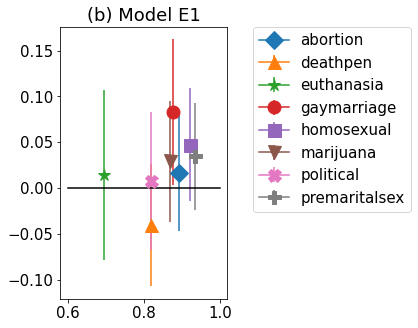

In [64]:
true_probs, _ = get_average_probs(true_bal_probs)
A1_probs, A1_probs_std = get_average_probs(bal_probs)

markers=["^","o","s","X","P" ,"*","D", "v"]

fig, ax = plt.subplots()
# plt.rcParams["figure.figsize"] = (10,5)
for i in indexes:
#     ax.plot(x=true_probs, y=true_probs - A1_probs, marker=markers[i], markersize=10, label=attribute)
    plt.errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i],yerr=A1_probs_std[i], marker=markers[i], 
                 markersize=13, label=names[i])
plt.title('(b) Model E1')
xlim = (0.6,1)
fig.set_size_inches(3, 5)
plt.plot(xlim,(0,0), color='black')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.rcParams.update({'font.size': 15})
    
if save_:
    plt.savefig("E1.pdf",dpi=600,bbox_inches='tight',format='pdf')

    with open(f'E1.pkl','wb') as fid:
        pickle.dump(fig, fid)

# Calc of p-values

In [301]:
triads_num = np.zeros(6)
for sem in range(1,7):
    triads_num[sem-1] = len(get_triads(data[sem]))
triads_sum = np.sum(triads_num)

true_probs*triads_sum

array([ 96., 127., 123., 129., 113., 113., 120., 121.])

In [305]:
successes = true_probs*triads_sum

[stats.binom_test(successes[i], n=triads_sum, p=A1_probs[i], alternative='greater')  for i in range(0,8)]

[0.3977202398214222,
 0.05583550539508722,
 0.32785010707480494,
 0.10647942865763449,
 0.4593653597397022,
 0.9283031069098591,
 0.20848106883623443,
 0.007898252011418982]

# Drawing above together

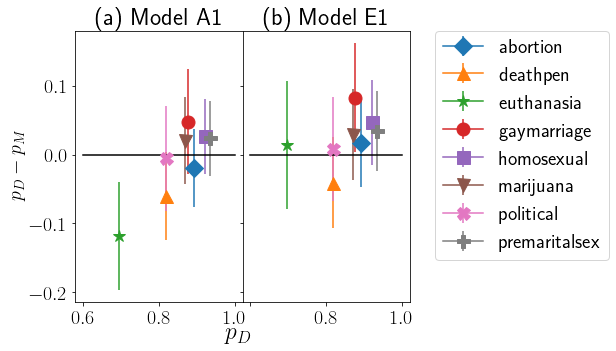

In [99]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

qrs_s, qrs_s2 = get_qrs(ord_attributes)
bal_probs = get_bal_probs(qrs_s)

true_probs, _ = get_average_probs(true_bal_probs)
A1_probs, A1_probs_std = get_average_probs(bal_probs)

markers=["^","o","s","X","P" ,"*","D", "v"]

for i in indexes:
    axs[0].errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i], yerr=A1_probs_std[i], marker=markers[i], 
                    markersize=13, label=names[i])
#     plt.errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i],yerr=A1_probs_std[i], marker=markers[i], 
#                  markersize=13, label=names[i])

axs[0].set_title('(a) Model A1')
xlim = (0.6,1)
# fig.set_size_inches(3, 5)
axs[0].plot(xlim,(0,0), color='black')


bal_probs = get_e1_bal_probs(e1_ab_probs)
A1_probs, A1_probs_std = get_average_probs(bal_probs)

markers=["^","o","s","X","P" ,"*","D", "v"]

# plt.rcParams["figure.figsize"] = (10,5)
for i in indexes:
    axs[1].errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i], yerr=A1_probs_std[i], marker=markers[i], 
            markersize=13, label=names[i])
#     plt.errorbar(x=true_probs[i], y=true_probs[i] - A1_probs[i],yerr=A1_probs_std[i], marker=markers[i], 
#                  markersize=13, label=names[i])
axs[1].set_title('(b) Model E1')
xlim = (0.6,1)
# fig.set_size_inches(3, 5)
axs[1].plot(xlim,(0,0), color='black')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

axs[0].set_xticks([0.6, 0.8, 1.])
axs[1].set_xticks([0.6, 0.8, 1.])
axs[1].set_xticklabels(['', r'$0.8$', r'$1.0$'])

plt.rcParams['text.usetex'] = True
fig.supxlabel(r'$p_D$')
axs[0].set_ylabel(r'$p_D-p_M$')
fig.set_size_inches(6, 5)
plt.rcParams.update({'font.size': 20})
    
if save_:
    plt.savefig("models1.pdf",dpi=600,bbox_inches='tight',format='pdf')


In [98]:
save_ = True